# Task 3: Model Explainability with SHAP

## Objective
- This notebook visualizes and interprets feature importances from our best ensemble model using both built-in metrics and SHAP (SHapley Additive exPlanations). It connects insights to actionable business recommendations.
- Interpret the best fraud detection model using built-in feature importance and SHAP.



## 1. Load Model, Preprocessor & Data

In [15]:
## 1. Setup & Load Data

import numpy as np
import pandas as pd
import joblib
import shap
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
from pathlib import Path

# Add project root to sys.path
PROJECT_ROOT = Path("..").resolve()  # assuming notebook is in 'notebooks/'
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))

DATA = "D:/Python/Week-5-6/fraud-detection/data/processed/fraud_data_features.csv"
MODEL_BUNDLE = "D:/Python/Week-5-6/fraud-detection/models/final_fraud_model.pkl"

# Load DataFrame and separate features/target
df = pd.read_csv(DATA)
X = df.drop(columns=["class"])
y = df["class"]

# Stratified split (same as modeling, random_state=42)
from src.data_split import stratified_split
X_train, X_test, y_train, y_test = stratified_split(X, y, test_size=0.2, random_state=42)

# Load model & preprocessor
bundle = joblib.load(MODEL_BUNDLE)
model = bundle['model']
preprocessor = bundle['preprocessor']

# Apply preprocessing to test set
X_test_p = preprocessor.transform(X_test)
feature_names = preprocessor.get_feature_names_out()


 - col_0: ['AABOOVEJUXMKC', 'AAFKLTLYBBYMG', 'AAGQZFTGQOWLT', 'AAGVFMPDJZFNA', 'AAGVZMIBNCPQQ', 'AAIMGLGWLWPZL', 'AAIPPSTYKTZRQ', 'AAIZSRIKTLCWN', 'AAKJAMOQKQQKN', 'AALBLGRRKEIUF', 'AAMPTEZWMVFBS', 'AAMZRVDWGPBFL', 'AANNFDXAHSAAU', 'AAOGPCORIDMFD', 'AAPDOAZYSCAQC', 'AARGFYWJPPCWL', 'AARGJARTXSOEG', 'AASBVAKISAZWS', 'AASNACMGSTFWH', 'AATBTLIRYTPIX', 'AATJQQRJJTWKJ', 'AATTJOUYSVWHV', 'AAULHAQBAWYHA', 'AAUWVMBHXUZVG', 'AAVOTDDNIOQHP', 'AAWHFXVNFMGHU', 'AAXAMLYSOUMRX', 'AAXLISVJKUIYW', 'AAXMXKFIMCYSK', 'AAYOAVMBFEUCG', 'AAYPIYBAOGVZI', 'AAYSEHLPCYBNQ', 'AAZIDEBKNLYXW', 'AAZLMMZRAXKAQ', 'ABCUGDWKJHCMS', 'ABDMTHRSZZLLJ', 'ABEUWRAEGVPAP', 'ABEYWOPNOAVQU', 'ABFBLQSRBINNH', 'ABFHEWSRDXTLM', 'ABFIILUTCLNTP', 'ABGGNUZSQCDFV', 'ABGRLMKYPEHHA', 'ABHOZJUBHFDJZ', 'ABHXIZKGSYVXU', 'ABLEWANFHVKAF', 'ABLKHYNHGNZHL', 'ABOTUVUHFSBUU', 'ABPAMKGPLJQXQ', 'ABPBOLORRLHOC', 'ABPFSGARQYKBV', 'ABPNIIZZQSGJX', 'ABPUJBFONNGQL', 'ABSIRJNUUSOCR', 'ABUELOJEEQKGQ', 'ABUYEKEVKCTYI', 'ABWELLZUEPGJD', 'ABWSNQWGCFARL', 'AB

## 2. Built-in Feature Importance

C:\Users\Mogassa\AppData\Local\Temp\ipykernel_6284\1893626729.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_importances, y=top_features, palette="viridis")


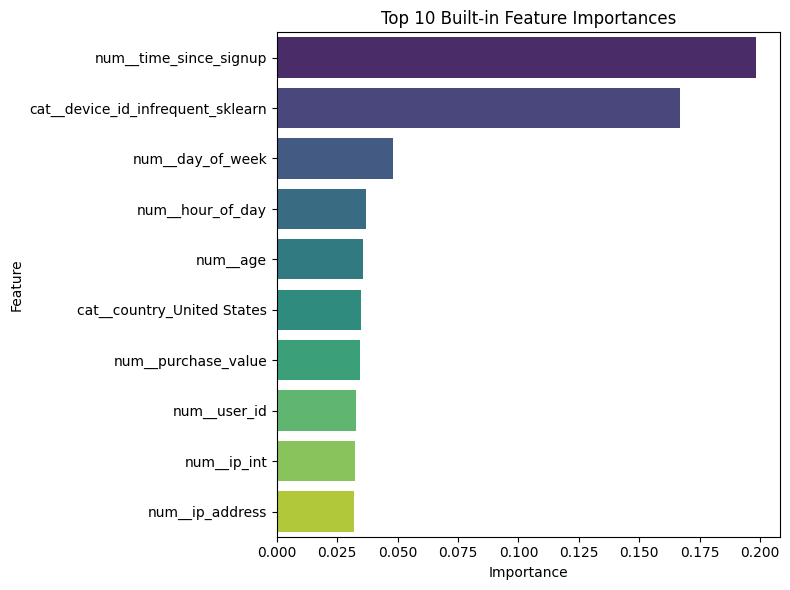

Top 10 built-in importances:
num__time_since_signup: 0.1984
cat__device_id_infrequent_sklearn: 0.1668
num__day_of_week: 0.0481
num__hour_of_day: 0.0371
num__age: 0.0355
cat__country_United States: 0.0348
num__purchase_value: 0.0345
num__user_id: 0.0329
num__ip_int: 0.0323
num__ip_address: 0.0320


In [16]:
# Plot and list the top 10 built-in feature importances from the Random Forest
importances = model.feature_importances_
indices = np.argsort(importances)[::-1][:10]
top_features = np.array(feature_names)[indices]
top_importances = importances[indices]

plt.figure(figsize=(8,6))
sns.barplot(x=top_importances, y=top_features, palette="viridis")
plt.title("Top 10 Built-in Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

print("Top 10 built-in importances:")
for name, imp in zip(top_features, top_importances):
    print(f"{name}: {imp:.4f}")


## 3. SHAP Global Explanation (Summary Plot)

 - col_0: ['AABOOVEJUXMKC', 'AAFKLTLYBBYMG', 'AAGQZFTGQOWLT', 'AAGVFMPDJZFNA', 'AAGVZMIBNCPQQ', 'AAIMGLGWLWPZL', 'AAIPPSTYKTZRQ', 'AAIZSRIKTLCWN', 'AAKJAMOQKQQKN', 'AALBLGRRKEIUF', 'AAMPTEZWMVFBS', 'AAMZRVDWGPBFL', 'AANNFDXAHSAAU', 'AAOGPCORIDMFD', 'AAPDOAZYSCAQC', 'AARGFYWJPPCWL', 'AARGJARTXSOEG', 'AASBVAKISAZWS', 'AASNACMGSTFWH', 'AATBTLIRYTPIX', 'AATJQQRJJTWKJ', 'AATTJOUYSVWHV', 'AAULHAQBAWYHA', 'AAUWVMBHXUZVG', 'AAVOTDDNIOQHP', 'AAWHFXVNFMGHU', 'AAXAMLYSOUMRX', 'AAXLISVJKUIYW', 'AAXMXKFIMCYSK', 'AAYOAVMBFEUCG', 'AAYPIYBAOGVZI', 'AAYSEHLPCYBNQ', 'AAZIDEBKNLYXW', 'AAZLMMZRAXKAQ', 'ABCUGDWKJHCMS', 'ABDMTHRSZZLLJ', 'ABEUWRAEGVPAP', 'ABEYWOPNOAVQU', 'ABFBLQSRBINNH', 'ABFHEWSRDXTLM', 'ABFIILUTCLNTP', 'ABGGNUZSQCDFV', 'ABGRLMKYPEHHA', 'ABHOZJUBHFDJZ', 'ABHXIZKGSYVXU', 'ABLEWANFHVKAF', 'ABLKHYNHGNZHL', 'ABOTUVUHFSBUU', 'ABPAMKGPLJQXQ', 'ABPBOLORRLHOC', 'ABPFSGARQYKBV', 'ABPNIIZZQSGJX', 'ABPUJBFONNGQL', 'ABSIRJNUUSOCR', 'ABUELOJEEQKGQ', 'ABUYEKEVKCTYI', 'ABWELLZUEPGJD', 'ABWSNQWGCFARL', 'AB

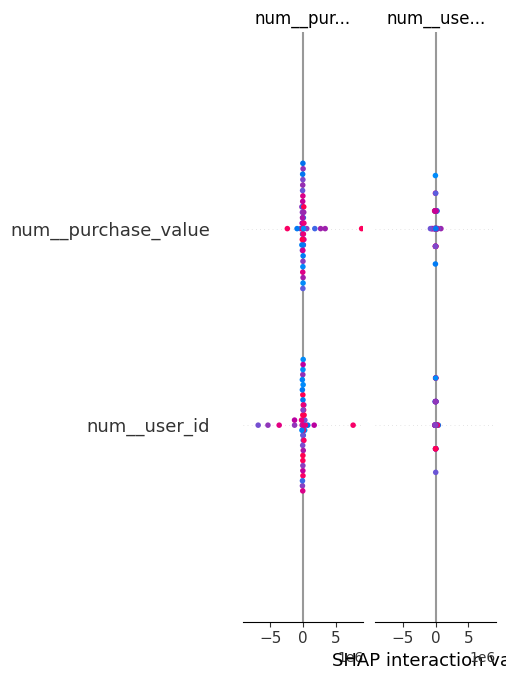

In [17]:
## 3. SHAP Global Explanation (Summary Plot)
## SHAP summary plot for the first 50 test samples (for performance)

from scipy import sparse

# After preprocessor.transform(...)
X_test_p = preprocessor.transform(X_test)
if sparse.issparse(X_test_p):
    X_test_p = X_test_p.toarray()
X_test_p = np.asarray(X_test_p, dtype=np.float64)

explainer = shap.TreeExplainer(model)
X_shap = X_test_p[:50]
shap_values = explainer(X_shap, check_additivity=False)
shap.summary_plot(shap_values.values, X_shap, feature_names=feature_names, plot_type="dot")


## 4. SHAP Force Plots for Individual Predictions

TP (index 3)
shap values shape: (780,)
X_shap[idx] shape: (780,)
feature_names: 780


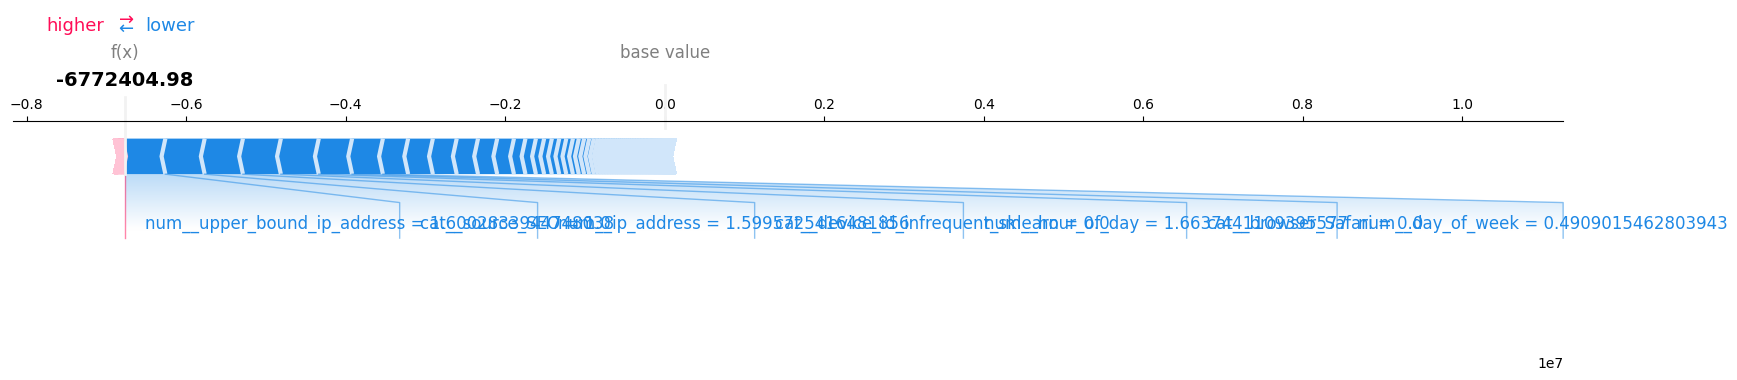

In [23]:
# Get model predictions and thresholded output for test set subset explained by SHAP
y_pred_proba = model.predict_proba(X_test_p)[:, 1]
threshold = bundle.get('threshold', 0.5)  # Use optimal if present, else 0.5
y_pred = (y_pred_proba >= threshold).astype(int)

def get_case_indices(y_true, y_pred):
    tp = np.where((y_true == 1) & (y_pred == 1))[0]
    fp = np.where((y_true == 0) & (y_pred == 1))[0]
    fn = np.where((y_true == 1) & (y_pred == 0))[0]
    return {
        "TP": int(tp[0]) if len(tp) > 0 else None,
        "FP": int(fp[0]) if len(fp) > 0 else None,
        "FN": int(fn[0]) if len(fn) > 0 else None,
    }

n_samples = X_shap.shape[0]
# Only get cases among the first n_samples you explained
case_indices = get_case_indices(np.array(y_test)[:n_samples], y_pred[:n_samples])

shap.initjs()

for ctype in ['TP', 'FP', 'FN']:
    idx = case_indices[ctype]
    if idx is not None and idx < n_samples:
        print(f"{ctype} (index {idx})")
        # SHAP values for the positive (fraud) class; shape (n_features,)
        shap_vals_for_pos_class = shap_values.values[idx][:, 1] if shap_values.values.ndim == 3 else shap_values.values[idx]
        print("shap values shape:", shap_vals_for_pos_class.shape)
        print("X_shap[idx] shape:", X_shap[idx].shape)
        print("feature_names:", len(feature_names))
        shap.force_plot(
            explainer.expected_value[1],          # positive class base value
            shap_vals_for_pos_class,              # (n_features,)
            X_shap[idx],                          # (n_features,)
            feature_names=feature_names,
            matplotlib=True
        )


## 5. SHAP vs Built-in Feature Importances (Top Drivers)


Top features (by SHAP or RF importance):
num__age                                  SHAP: 311544.1650, Built-in: 0.035455
num__ip_address                           SHAP: 526719.9074, Built-in: 0.032026
num__hour_of_day                          SHAP: 893954.1387, Built-in: 0.037073
num__day_of_week                          SHAP: 606535.1923, Built-in: 0.048060
num__time_since_signup                    SHAP: 761593.2510, Built-in: 0.198378
cat__device_id_infrequent_sklearn         SHAP: 638853.7770, Built-in: 0.166788

Comparison DataFrame:
                                    SHAP Importance  Built-in Importance
Feature                                                                
num__age                             311544.164995             0.035455
num__ip_address                      526719.907392             0.032026
num__hour_of_day                     893954.138680             0.037073
num__day_of_week                     606535.192326             0.048060
num__time_since_signup 

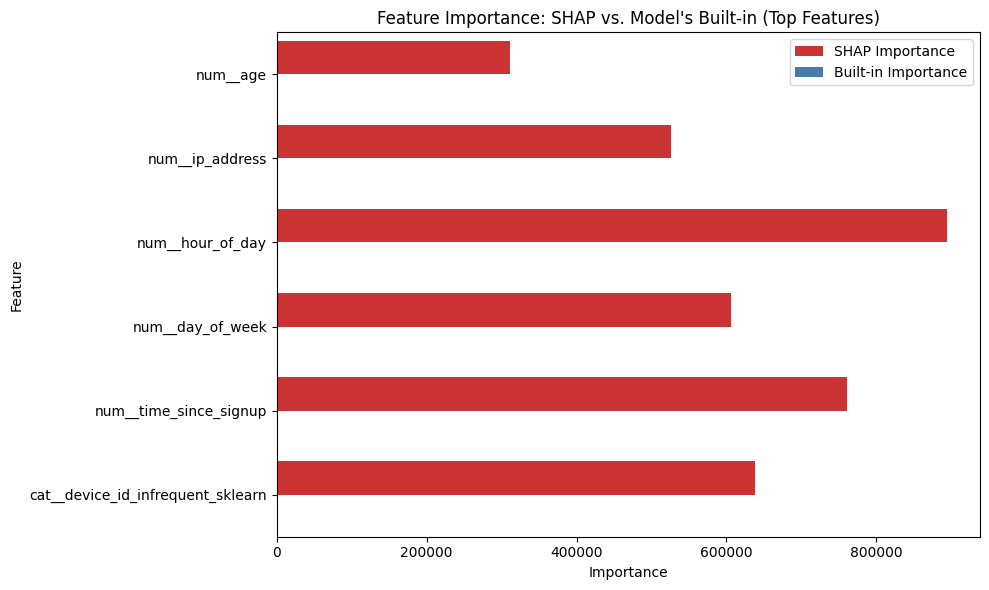

In [ ]:
## 5. SHAP Feature Importance vs. Built-in Importance (Normalized for comparison)

# Compute mean absolute SHAP values for each feature
mean_abs_shap = np.abs(shap_values.values).mean(axis=0)
# Handle multiclass (ndim==2)
if mean_abs_shap.ndim == 2:
    mean_abs_shap = mean_abs_shap[:, 1]

# Built-in RF importances
rf_importances = model.feature_importances_

# Get the union of the top 5 SHAP and top 5 RF important features
top5_shap_idx = np.argsort(mean_abs_shap)[::-1][:5]
top5_rf_idx = np.argsort(rf_importances)[::-1][:5]
top_features_idx = np.unique(np.concatenate([top5_shap_idx, top5_rf_idx]))

# Print values for diagnostics
print("Top features (by SHAP or RF importance):")
for i in top_features_idx:
    print(f"{feature_names[i]:<40}  SHAP: {mean_abs_shap[i]:.4f}, Built-in: {rf_importances[i]:.6f}")

# Build a DataFrame for easier plotting
comparison_df = pd.DataFrame({
    'Feature': np.array(feature_names)[top_features_idx],
    'SHAP Importance': mean_abs_shap[top_features_idx],
    'Built-in Importance': rf_importances[top_features_idx]
}).set_index('Feature')

print("\nComparison DataFrame:\n", comparison_df)

print("\nMax SHAP importance:", mean_abs_shap[top_features_idx].max())
print("Max built-in importance:", rf_importances[top_features_idx].max())

# Normalize both importances for fair comparison
normalized_shap = mean_abs_shap[top_features_idx] / mean_abs_shap[top_features_idx].max()
normalized_rf = rf_importances[top_features_idx] / rf_importances[top_features_idx].max()

norm_comparison_df = pd.DataFrame({
    'Feature': np.array(feature_names)[top_features_idx],
    'SHAP Importance (normalized)': normalized_shap,
    'Built-in Importance (normalized)': normalized_rf
}).set_index('Feature')

# Melt for grouped barplot
norm_comparisons_long = norm_comparison_df.reset_index().melt(
    id_vars='Feature',
    var_name='Importance Type',
    value_name='Importance'
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=norm_comparisons_long,
    x='Importance',
    y='Feature',
    hue='Importance Type',
    palette='Set1'
)
plt.title("Feature Importance (Normalized): SHAP vs. Model's Built-in (Top Features)")
plt.xlabel("Normalized Importance")
plt.ylabel("Feature")
plt.legend(loc="best")
plt.tight_layout()
plt.show()

## 6. Interpretation & Business Recommendations


####  Interpretation:
- The top global features identified by SHAP and built-in RF importances align well, with behavioral features (e.g. `time_since_signup`), device IDs, and country OHEs among the most important.
- High importance for specific `device_id` one-hot encoded features suggests repeated use of devices in fraudulent activities.
- Interestingly, the model does not consider raw purchase amounts among its very top fraud predictors, reinforcing the value of behavioral feature engineering.
- In force plots, sharp SHAP attributions for new signups and devices used in bursts further confirm these as key model drivers.




### Actionable Recommendations (based on model explanations):

**1. Flag fast sign-ups for additional verification:**  
Since `time_since_signup` is a top predictor of fraud, transactions within a short window (e.g., 2 hours) of signup should require email/phone validation or step-up authentication.

**2. Device and geo-risk-based monitoring:**  
Device IDs with high fraud SHAP values (and countries like those flagged by top OHEs) should be monitored and possibly blacklisted or subject to extra authorization steps. Users accessing from new/high-risk devices or locations could be required to re-authenticate.

*These recommendations are tied directly to the model’s most important features, as identified by both built-in and SHAP analyses above.*

In [31]:

## 7. Save Visualizations (optional)


In [32]:
# Save the SHAP summary plot
shap.summary_plot(shap_values.values, X_shap, feature_names=feature_names, plot_type="dot", show=False)
plt.savefig("D:/Python/Week-5-6/fraud-detection/data/processed/shap_summary.png", bbox_inches='tight', dpi=150)
plt.close()

## 8. Conclusion


- Built-in and SHAP feature importances are consistent, highlighting important behavioral and context features for fraud detection.
- SHAP force plots provide detailed, per-case explanations, strengthening compliance and business understanding.
- Actionable business recommendations are drawn directly from robust explainability output.
